# CO2 monitor comparison

CO2 covid project @ CMM & CATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes

/home/fforster/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  """Entry point for launching an IPython kernel.


In [3]:
import os, sys

In [4]:
os.listdir("./data")

['Aranet4 00A0F_2021-03-01T20_44_28.csv',
 'Aranet4 00A0F_2021-03-02T00_04_26.csv',
 'aranet4 ff_2021-02-08T09_31_27.csv',
 'Aranet4 00A0F_2021-02-28T21_57_50.csv',
 'Miguel_20210116.csv',
 '20210218_mhz19+css811.txt',
 'Aranet4 00A0F_2021-03-01T23_23_26.csv',
 'mhz19b_20210301.txt',
 'Aranet4 00A0F_2021-02-18T11_42_35.csv',
 'aranet4 ff_2021-01-17T19_19_06.csv',
 'Aranet4 00A0F_2021-02-18T00_13_47.csv',
 'Miguel_20210119_noche.csv',
 'mhz19b_20210207.txt',
 'Aranet4 00A0F_2021-03-02T08_50_26.csv',
 'aranet4 ff_2021-02-07T21_38_31.csv',
 'Aranet4 00A0F_2021-03-01T09_38_40.csv',
 'aranet4 ff_2021-02-07T21_13_02.csv',
 'Aranet4 00A0F_2021-02-18T10_08_44.csv',
 'mhz19b_20210228.txt',
 'Aranet4 00A0F_2021-03-01T23_22_26.csv',
 'Aranet4 00A0F_2021-02-17T20_55_47.csv',
 '20210217_mhz19+cs811.txt',
 'aranet4 ff_2021-02-07T21_11_37.csv',
 'mhz19_esp8266_20210301.txt',
 '20210217b_mhz19+css811.txt']

In [5]:
filename = "data/aranet4 ff_2021-01-17T19_19_06.csv"
df = pd.read_csv(filename)
df.rename({"CO₂(ppm)": "CO2"}, axis=1, inplace=True)
df["Time"] = pd.to_datetime(df.Time)
df = df.sort_values("Time")
df

,Time,CO2,Temperature(°C),Humidity(%),Pressure(hPa)
0,2021-01-14 07:19:06,396,22.3,28,946
1,2021-01-14 07:20:06,417,22.3,28,946
2,2021-01-14 07:21:06,413,22.3,28,946
3,2021-01-14 07:22:06,399,22.3,28,946
4,2021-01-14 07:23:06,413,22.3,28,946
5,2021-01-14 07:24:06,401,22.3,28,946
6,2021-01-14 07:25:06,397,22.3,28,946
7,2021-01-14 07:26:06,413,22.3,28,946
8,2021-01-14 07:27:06,403,22.3,28,946
9,2021-01-14 07:28:06,385,22.3,28,946


In [6]:
os.listdir("data")

['Aranet4 00A0F_2021-03-01T20_44_28.csv',
 'Aranet4 00A0F_2021-03-02T00_04_26.csv',
 'aranet4 ff_2021-02-08T09_31_27.csv',
 'Aranet4 00A0F_2021-02-28T21_57_50.csv',
 'Miguel_20210116.csv',
 '20210218_mhz19+css811.txt',
 'Aranet4 00A0F_2021-03-01T23_23_26.csv',
 'mhz19b_20210301.txt',
 'Aranet4 00A0F_2021-02-18T11_42_35.csv',
 'aranet4 ff_2021-01-17T19_19_06.csv',
 'Aranet4 00A0F_2021-02-18T00_13_47.csv',
 'Miguel_20210119_noche.csv',
 'mhz19b_20210207.txt',
 'Aranet4 00A0F_2021-03-02T08_50_26.csv',
 'aranet4 ff_2021-02-07T21_38_31.csv',
 'Aranet4 00A0F_2021-03-01T09_38_40.csv',
 'aranet4 ff_2021-02-07T21_13_02.csv',
 'Aranet4 00A0F_2021-02-18T10_08_44.csv',
 'mhz19b_20210228.txt',
 'Aranet4 00A0F_2021-03-01T23_22_26.csv',
 'Aranet4 00A0F_2021-02-17T20_55_47.csv',
 '20210217_mhz19+cs811.txt',
 'aranet4 ff_2021-02-07T21_11_37.csv',
 'mhz19_esp8266_20210301.txt',
 '20210217b_mhz19+css811.txt']

In [7]:
filename = "data/Miguel_20210116.csv"
df2 = pd.read_csv(filename)
df2.rename({"seconds": "Time"}, axis=1, inplace=True)
df2

,CO2,Time
0,481,0.00
1,481,0.99
2,473,1.98
3,464,2.97
4,460,3.96
5,464,4.95
6,460,5.94
7,446,6.93
8,446,7.92
9,444,8.91


/home/fforster/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([  8.,  21.,  50., 101., 117., 133.,  92.,  52.,  20.,   6.]),
 array([344., 349., 354., 359., 364., 369., 374., 379., 384., 389., 394.]),
 <a list of 10 Patch objects>)

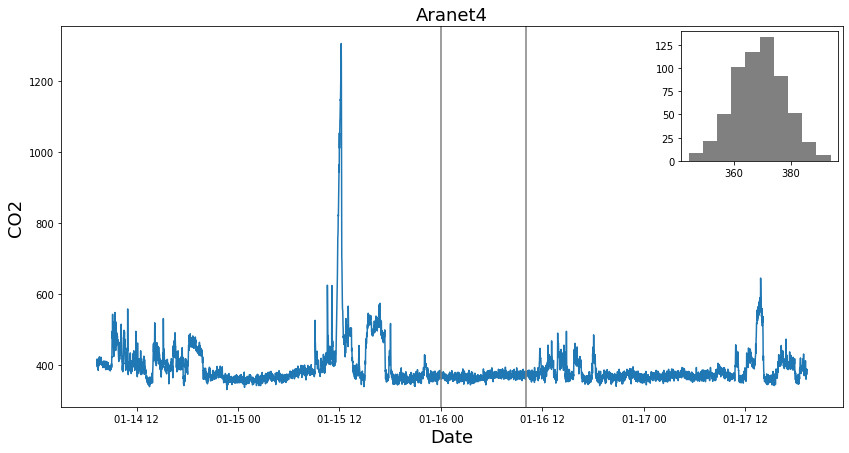

In [8]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(df.Time, df["CO2"])
ax.set_xlabel("Date", fontsize=18)
ax.set_ylabel("CO2", fontsize=18)
ax.set_title("Aranet4", fontsize=18)
tmin = pd.to_datetime("2021-01-16 00:00:00")
tmax = pd.to_datetime("2021-01-16 10:00:00")
ax.axvline(tmin, c='gray')
ax.axvline(tmax, c='gray')
inset = inset_axes(ax, 
                    width="20%", # width = 30% of parent_bbox
                    height=1.8, # height : 1 inch
                    loc=1)
inset.hist(df.loc[(df.Time > tmin) & (df.Time < tmax)]["CO2"], color='gray')

(array([17.,  8., 28., 44., 84., 34., 10.,  8., 11.,  8.]),
 array([643. , 655.5, 668. , 680.5, 693. , 705.5, 718. , 730.5, 743. ,
        755.5, 768. ]),
 <a list of 10 Patch objects>)

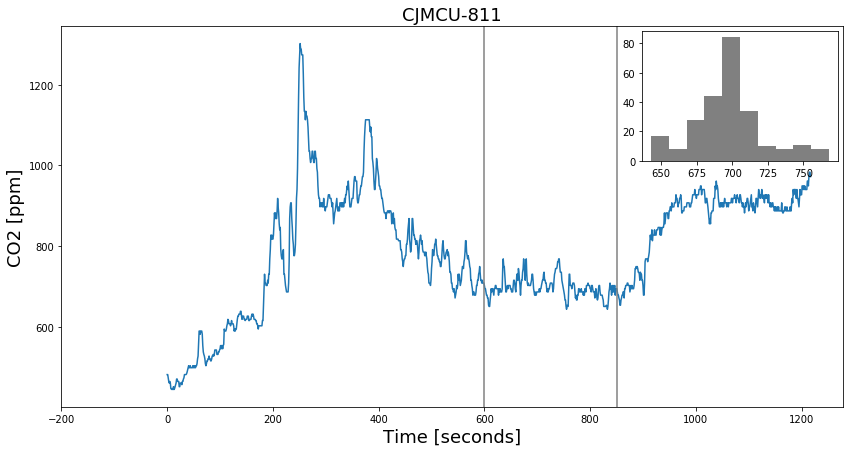

In [9]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(df2.Time, df2["CO2"])
ax.set_xlabel("Time [seconds]", fontsize=18)
ax.set_ylabel("CO2 [ppm]", fontsize=18)
ax.set_title("CJMCU-811", fontsize=18)
tmin = 600
tmax = 850
ax.axvline(tmin, c='gray')
ax.axvline(tmax, c='gray')
ax.set_xlim(-200, ax.get_xlim()[1])
inset = inset_axes(ax, 
                    width="25%", # width = 30% of parent_bbox
                    height=1.8, # height : 1 inch
                    loc=1)
inset.hist(df2.loc[(df2.Time > tmin) & (df2.Time < tmax)]["CO2"], color='gray')

In [10]:
filename = "data/Miguel_20210119_noche.csv"
df3 = pd.read_csv(filename)
df3.rename({"seconds": "Time"}, axis=1, inplace=True)
df3

,CO2,Time
0,400,0.00
1,400,0.99
2,400,1.98
3,400,2.97
4,400,3.96
5,400,4.95
6,400,5.94
7,400,6.93
8,405,7.92
9,405,8.91


In [29]:
def read_css811(filename, t0):
    data = open(filename, 'r').read()
    # 18:21:52.193 -> CO2 (CSS811): 418ppm, TVOC: 2ppb Temp:22.25
    data = re.findall("(\d\d):(\d\d):(\d\d)\.(\d\d\d).*?(\d+)ppm.*?(\d+)ppb.*?(\d+\.\d+)", data)
    df = pd.DataFrame(data, columns = ["hr", "min", "sec", "msec", "CO2", "TVOC", "Temp"])
    df["CO2"] = pd.to_numeric(df["CO2"])
    df["TVOC"] = pd.to_numeric(df["TVOC"])
    df["Temp"] = pd.to_numeric(df["Temp"])
    df["Time"] = df.apply(lambda row: pd.to_datetime("%s%s%s%s%06i" % (filename[5:13], row["hr"], row["min"], row["sec"], 1000 * int(row["msec"])), format="%Y%m%d%H%M%S%f"), axis=1)
    df["dt_sec"] = df.apply(lambda row: (row["Time"] - t0).total_seconds(), axis=1)
    return df

In [30]:
def read_mhz19b(filename, t0):
    data = open(filename, 'r').read()
    # 18:21:22.212 -> CO2 (Z19): 395
    data = re.findall("(\d\d):(\d\d):(\d\d)\.(\d\d\d).*?Z19.*?(\d+)", data)
    df = pd.DataFrame(data, columns = ["hr", "min", "sec", "msec", "CO2"])
    df["CO2"] = pd.to_numeric(df["CO2"])
    df["Time"] = df.apply(lambda row: pd.to_datetime("%s%s%s%s%06i" % (filename[5:13], row["hr"], row["min"], row["sec"], 1000 * int(row["msec"])), format="%Y%m%d%H%M%S%f"), axis=1)
    df["dt_sec"] = df.apply(lambda row: (row["Time"] - t0).total_seconds(), axis=1)
    return df

In [61]:
def read_mhz19b_wifwaf(filename, t0):
    data = open(filename, 'r').read()
    data = re.findall("(\d\d):(\d\d):(\d\d)\.(\d\d\d).*?ppm.*?(\d+).*?\n\n.*?C.*?(\d+)", data)
    df = pd.DataFrame(data, columns = ["hr", "min", "sec", "msec", "CO2", "Temp"])
    df["CO2"] = pd.to_numeric(df["CO2"])
    df["Temp"] = pd.to_numeric(df["Temp"])
    df["Time"] = df.apply(lambda row: pd.to_datetime("%s%s%s%s%06i" % (filename[-12:-4], row["hr"], row["min"], row["sec"], 1000 * int(row["msec"])), format="%Y%m%d%H%M%S%f"), axis=1)
    df["dt_sec"] = df.apply(lambda row: (row["Time"] - t0).total_seconds(), axis=1)
    return df

In [14]:
def read_mhz19b_old(filename, t0):
    data = open(filename, 'r').read()
    data = re.findall("(\d\d):(\d\d):(\d\d)\.(\d\d\d).*?PPMpwm:.*?(\d+)", data)
    df = pd.DataFrame(data, columns = ["hr", "min", "sec", "msec", "CO2"])
    df["CO2"] = pd.to_numeric(df["CO2"])
    df["Time"] = df.apply(lambda row: pd.to_datetime("%s%s%s%s%06i" % (filename[-12:-4], row["hr"], row["min"], row["sec"], 1000 * int(row["msec"])), format="%Y%m%d%H%M%S%f"), axis=1)
    df["dt_sec"] = df.apply(lambda row: (row["Time"] - t0).total_seconds(), axis=1)
    return df

In [15]:
def read_aranet(filename, t0):
    df = pd.read_csv(filename)
    df.rename({"CO₂(ppm)": "CO2"}, axis=1, inplace=True)
    df["Time"] = pd.to_datetime(df.Time)
    df["dt_sec"] = df.apply(lambda row: (row["Time"] - t0).total_seconds(), axis=1)
    df = df.sort_values("Time")
    return df

,hr,min,sec,msec,CO2,TVOC,Temp,Time,dt_sec
0,18,21,52,193,418,2,22.25,2021-02-17 18:21:52.193,1132.193
1,18,22,53,318,400,0,27.96,2021-02-17 18:22:53.318,1193.318
2,18,23,54,453,418,2,25.00,2021-02-17 18:23:54.453,1254.453
3,18,24,55,586,415,2,22.25,2021-02-17 18:24:55.586,1315.586
4,18,25,56,720,400,0,29.38,2021-02-17 18:25:56.720,1376.720


,hr,min,sec,msec,CO2,Time,dt_sec
0,18,21,22,212,395,2021-02-17 18:21:22.212,1102.212
1,18,22,23,340,395,2021-02-17 18:22:23.340,1163.340
2,18,23,24,470,395,2021-02-17 18:23:24.470,1224.470
3,18,24,25,602,395,2021-02-17 18:24:25.602,1285.602
4,18,25,26,735,395,2021-02-17 18:25:26.735,1346.735


,Time,CO2,Temperature(C),Humidity(%),Pressure(hPa),dt_sec
0,2021-02-17 16:25:47,530,21.5,59,1005,-5833.0
1,2021-02-17 16:26:47,412,21.5,58,1005,-5773.0
2,2021-02-17 16:27:47,393,21.4,57,1005,-5713.0
3,2021-02-17 16:28:47,392,21.4,57,1005,-5653.0
4,2021-02-17 16:29:47,368,21.4,56,1005,-5593.0


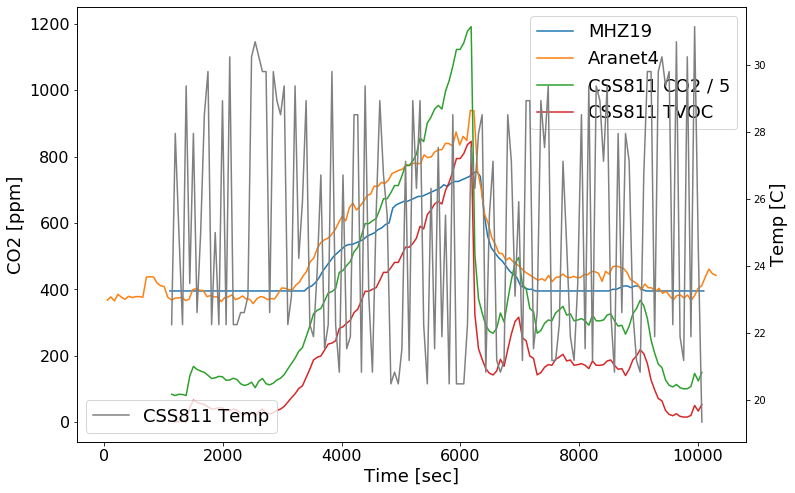

In [16]:
t0 = pd.to_datetime("2021-02-17 18:03:00")
df_css811 = read_css811("data/20210217_mhz19+cs811.txt", t0)
display(df_css811.head())
df_mhz19 = read_mhz19b("data/20210217_mhz19+cs811.txt", t0)
display(df_mhz19.head())
df_aranet = read_aranet("data/Aranet4 00A0F_2021-02-17T20_55_47.csv", t0)
display(df_aranet.head())
fig, ax = plt.subplots(figsize=(12, 8))
tmax = pd.to_datetime("2021-02-17 23:59:00")
mask = (df_mhz19.Time > t0) & (df_mhz19.Time < tmax)
ax.plot(df_mhz19.loc[mask].dt_sec, df_mhz19.loc[mask].CO2, label="MHZ19")
mask = (df_aranet.Time > t0) & (df_aranet.Time < tmax)
ax.plot(df_aranet.loc[mask].dt_sec, df_aranet.loc[mask].CO2, label="Aranet4")
mask = (df_css811.Time > t0) & (df_css811.Time < tmax)
#ax.plot(df_css811.loc[mask].dt_sec, (df_css811.loc[mask].CO2**0.68)*2 + 200, label="CSS811^")
ax.plot(df_css811.loc[mask].dt_sec, df_css811.loc[mask].CO2 / 5, label="CSS811 CO2 / 5")
ax.plot(df_css811.loc[mask].dt_sec, df_css811.loc[mask].TVOC, label="CSS811 TVOC")
#ax.plot(df_css811.loc[mask].dt_sec, df_css811.loc[mask].CO2, label="CSS811")
ax.set_xlabel("Time [sec]", fontsize=18)
ax.set_ylabel("CO2 [ppm]", fontsize=18)
#ax.set_yscale("log")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18)
ax2 = ax.twinx()
ax2.plot(df_css811.loc[mask].dt_sec, df_css811.loc[mask].Temp, label="CSS811 Temp", c='gray')
ax2.set_ylabel("Temp [C]", fontsize=18)
plt.legend(fontsize=18)

,hr,min,sec,msec,CO2,TVOC,Temp,Time,dt_sec
0,20,59,51,305,481,12,38.25,2021-02-17 20:59:51.305,3591.305
1,21,00,53,453,602,30,34.16,2021-02-17 21:00:53.453,3653.453
2,21,01,55,605,665,40,24.65,2021-02-17 21:01:55.605,3715.605
3,21,02,57,785,615,32,37.10,2021-02-17 21:02:57.785,3777.785
4,21,03,59,938,656,39,38.74,2021-02-17 21:03:59.938,3839.938


,hr,min,sec,msec,CO2,Time,dt_sec
0,20,59,21,329,420,2021-02-17 20:59:21.329,3561.329
1,21,00,23,477,430,2021-02-17 21:00:23.477,3623.477
2,21,01,25,625,435,2021-02-17 21:01:25.625,3685.625
3,21,02,27,807,435,2021-02-17 21:02:27.807,3747.807
4,21,03,29,959,440,2021-02-17 21:03:29.959,3809.959


,Time,CO2,Temperature(C),Humidity(%),Pressure(hPa),dt_sec
0,2021-02-17 16:25:44,530,21.5,59,1005,-12856.0
1,2021-02-17 16:26:44,412,21.5,58,1005,-12796.0
2,2021-02-17 16:27:44,393,21.4,57,1005,-12736.0
3,2021-02-17 16:28:44,392,21.4,57,1005,-12676.0
4,2021-02-17 16:29:44,368,21.4,56,1005,-12616.0


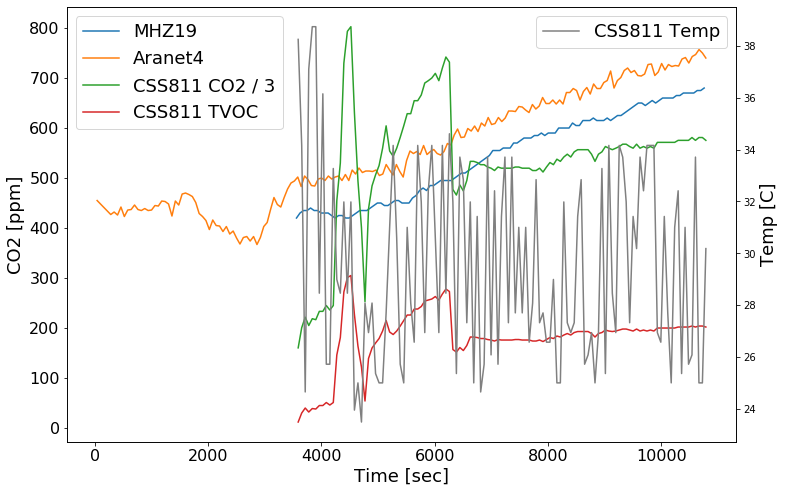

In [17]:
t0 = pd.to_datetime("2021-02-17 20:00:00")
tmax = pd.to_datetime("2021-02-17 23:00:00")
df_css811 = read_css811("data/20210217b_mhz19+css811.txt", t0)
display(df_css811.head())
df_mhz19 = read_mhz19b("data/20210217b_mhz19+css811.txt", t0)
display(df_mhz19.head())
df_aranet = read_aranet("data/Aranet4 00A0F_2021-02-18T10_08_44.csv", t0)
display(df_aranet.head())
fig, ax = plt.subplots(figsize=(12, 8))
mask = (df_mhz19.Time > t0) & (df_mhz19.Time < tmax)
ax.plot(df_mhz19.loc[mask].dt_sec, df_mhz19.loc[mask].CO2, label="MHZ19")
mask = (df_aranet.Time > t0) & (df_aranet.Time < tmax)
ax.plot(df_aranet.loc[mask].dt_sec, df_aranet.loc[mask].CO2, label="Aranet4")
mask = (df_css811.Time > t0) & (df_css811.Time < tmax)
ax.plot(df_css811.loc[mask].dt_sec, df_css811.loc[mask].CO2 / 3, label="CSS811 CO2 / 3")
ax.plot(df_css811.loc[mask].dt_sec, df_css811.loc[mask].TVOC, label="CSS811 TVOC")
ax.set_xlabel("Time [sec]", fontsize=18)
ax.set_ylabel("CO2 [ppm]", fontsize=18)
#ax.set_yscale("log")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18)
ax2 = ax.twinx()
ax2.plot(df_css811.loc[mask].dt_sec, df_css811.loc[mask].Temp, label="CSS811 Temp", c='gray')
ax2.set_ylabel("Temp [C]", fontsize=18)
plt.legend(fontsize=18)

,hr,min,sec,msec,CO2,TVOC,Temp,Time,dt_sec
0,00,00,52,709,2454,312,23.95,2021-02-18 00:00:52.709,52.709
1,00,01,53,797,2436,310,38.25,2021-02-18 00:01:53.797,113.797
2,00,02,55,119,2454,312,38.74,2021-02-18 00:02:55.119,175.119
3,00,03,56,251,2454,312,33.71,2021-02-18 00:03:56.251,236.251
4,00,04,57,364,2436,310,26.08,2021-02-18 00:04:57.364,297.364


,hr,min,sec,msec,CO2,Time,dt_sec
0,00,00,22,781,715,2021-02-18 00:00:22.781,22.781
1,00,01,23,840,715,2021-02-18 00:01:23.840,83.840
2,00,02,24,970,715,2021-02-18 00:02:24.970,144.970
3,00,03,26,254,715,2021-02-18 00:03:26.254,206.254
4,00,04,27,465,715,2021-02-18 00:04:27.465,267.465


,Time,CO2,Temperature(C),Humidity(%),Pressure(hPa),dt_sec
0,2021-02-17 16:25:35,530,21.5,59,1005,-27265.0
1,2021-02-17 16:26:35,412,21.5,58,1005,-27205.0
2,2021-02-17 16:27:35,393,21.4,57,1005,-27145.0
3,2021-02-17 16:28:35,392,21.4,57,1005,-27085.0
4,2021-02-17 16:29:35,368,21.4,56,1005,-27025.0


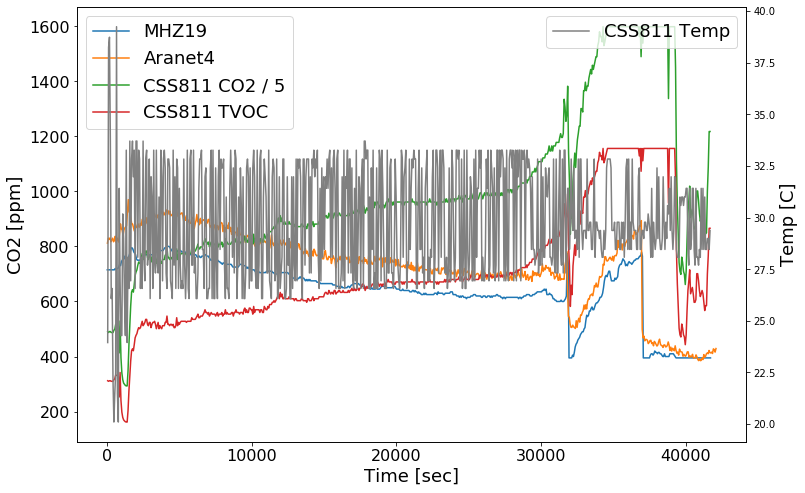

In [18]:
t0 = pd.to_datetime("2021-02-18 00:00:00")
tmax = pd.to_datetime("2021-02-18 10:30:00")
df_css811 = read_css811("data/20210218_mhz19+css811.txt", t0)
display(df_css811.head())
df_mhz19 = read_mhz19b("data/20210218_mhz19+css811.txt", t0)
display(df_mhz19.head())
df_aranet = read_aranet("data/Aranet4 00A0F_2021-02-18T11_42_35.csv", t0)
display(df_aranet.head())
fig, ax = plt.subplots(figsize=(12, 8))
mask = (df_mhz19.Time > t0) #& (df_mhz19.Time < tmax)
ax.plot(df_mhz19.loc[mask].dt_sec, df_mhz19.loc[mask].CO2, label="MHZ19")
mask = (df_aranet.Time > t0) #& (df_aranet.Time < tmax)
ax.plot(df_aranet.loc[mask].dt_sec, df_aranet.loc[mask].CO2, label="Aranet4")
mask = (df_css811.Time > t0) #& (df_css811.Time < tmax)
#ax.plot(df_css811.loc[mask].dt_sec, (df_css811.loc[mask].CO2**0.68)*2 + 200, label="CSS811^")
ax.plot(df_css811.loc[mask].dt_sec, df_css811.loc[mask].CO2 / 5, label="CSS811 CO2 / 5")
ax.plot(df_css811.loc[mask].dt_sec, df_css811.loc[mask].TVOC, label="CSS811 TVOC")
#ax.plot(df_css811.loc[mask].dt_sec, df_css811.loc[mask].CO2, label="CSS811")
ax.set_xlabel("Time [sec]", fontsize=18)
ax.set_ylabel("CO2 [ppm]", fontsize=18)
#ax.set_yscale("log")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18)
ax2 = ax.twinx()
ax2.plot(df_css811.loc[mask].dt_sec, df_css811.loc[mask].Temp, label="CSS811 Temp", c='gray')
ax2.set_ylabel("Temp [C]", fontsize=18)
plt.legend(fontsize=18)

,hr,min,sec,msec,CO2,Time,dt_sec
0,18,09,21,122,395,2021-02-28 18:09:21.122,-6638.878
1,18,09,52,178,395,2021-02-28 18:09:52.178,-6607.822
2,18,10,23,220,395,2021-02-28 18:10:23.220,-6576.780
3,18,10,54,294,395,2021-02-28 18:10:54.294,-6545.706
4,18,11,25,335,395,2021-02-28 18:11:25.335,-6514.665


,Time,CO2,Temperature(C),Humidity(%),Pressure(hPa),dt_sec
0,2021-02-25 09:57:50,739,19.7,60,999,-295330.0
1,2021-02-25 09:58:50,722,19.7,60,999,-295270.0
2,2021-02-25 09:59:50,717,19.7,60,999,-295210.0
3,2021-02-25 10:00:50,709,19.7,60,999,-295150.0
4,2021-02-25 10:01:50,714,19.7,60,999,-295090.0


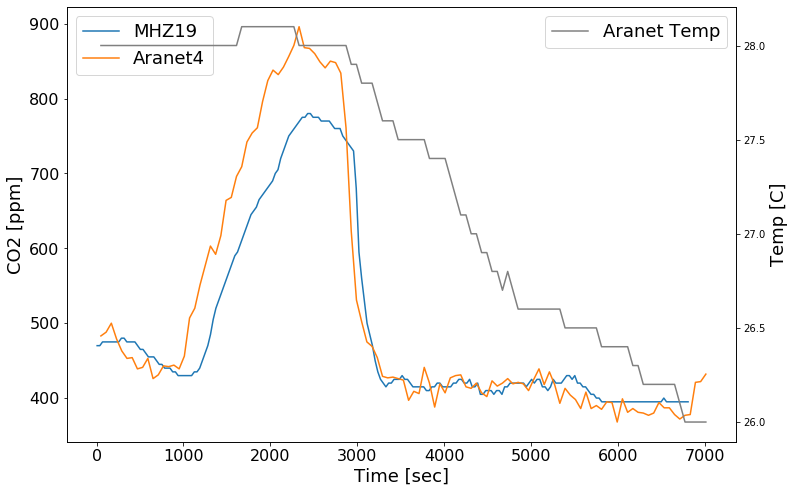

In [19]:
t0 = pd.to_datetime("2021-02-28 20:00:00")
tmax = pd.to_datetime("2021-02-28 23:00:00")
df_mhz19 = read_mhz19b_old("data/mhz19b_20210228.txt", t0)
display(df_mhz19.head())
df_aranet = read_aranet("data/Aranet4 00A0F_2021-02-28T21_57_50.csv", t0)
display(df_aranet.head())
fig, ax = plt.subplots(figsize=(12, 8))
mask = (df_mhz19.Time > t0) #& (df_mhz19.Time < tmax)
ax.plot(df_mhz19.loc[mask].dt_sec, df_mhz19.loc[mask].CO2, label="MHZ19")
mask = (df_aranet.Time > t0) #& (df_aranet.Time < tmax)
ax.plot(df_aranet.loc[mask].dt_sec, df_aranet.loc[mask].CO2, label="Aranet4")
ax.set_xlabel("Time [sec]", fontsize=18)
ax.set_ylabel("CO2 [ppm]", fontsize=18)
#ax.set_yscale("log")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18, loc=2)
ax2 = ax.twinx()
ax2.plot(df_aranet.loc[mask].dt_sec, df_aranet.loc[mask]["Temperature(C)"], label="Aranet Temp", c='gray')
ax2.set_ylabel("Temp [C]", fontsize=18)
plt.legend(fontsize=18, loc = 1)

,hr,min,sec,msec,CO2,Time,dt_sec
0,22,05,41,676,395,2021-02-28 22:05:41.676,341.676
1,22,06,11,741,395,2021-02-28 22:06:11.741,371.741
2,22,06,41,831,395,2021-02-28 22:06:41.831,401.831
3,22,07,11,889,395,2021-02-28 22:07:11.889,431.889
4,22,07,41,945,395,2021-02-28 22:07:41.945,461.945


,Time,CO2,Temperature(C),Humidity(%),Pressure(hPa),dt_sec
0,2021-02-25 21:36:40,803,22.2,64,1000,-260600.0
1,2021-02-25 21:37:40,798,22.2,64,1000,-260540.0
2,2021-02-25 21:38:40,785,22.2,64,1000,-260480.0
3,2021-02-25 21:39:40,814,22.2,64,1000,-260420.0
4,2021-02-25 21:40:40,796,22.2,64,1000,-260360.0


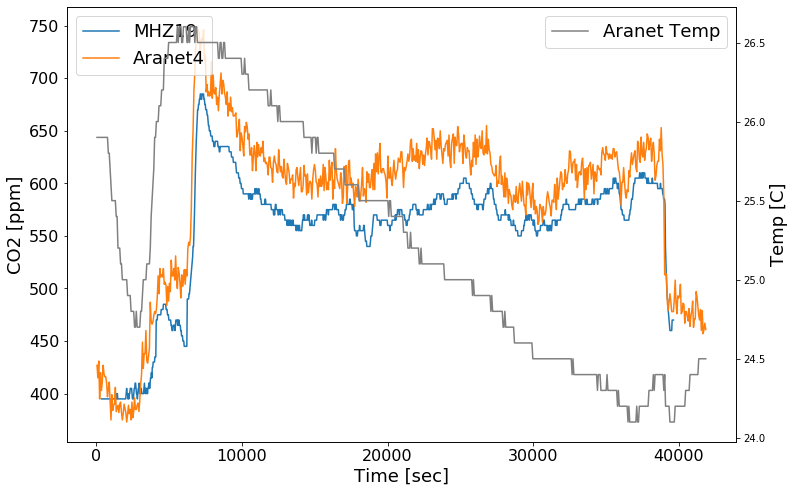

In [20]:
t0 = pd.to_datetime("2021-02-28 22:00:00")
tmax = pd.to_datetime("2021-03-01 23:00:00")
df_mhz19 = read_mhz19b_old("data/mhz19b_20210301.txt", t0)
masktime = df_mhz19.Time < pd.to_datetime("2021-03-01 12:00:00")
df_mhz19.Time = df_mhz19.Time.where(masktime, df_mhz19.Time - pd.Timedelta(1, unit='days'))
df_mhz19.dt_sec = df_mhz19.apply(lambda row: (row["Time"] - t0).total_seconds(), axis=1)
display(df_mhz19.head())
df_aranet = read_aranet("data/Aranet4 00A0F_2021-03-01T09_38_40.csv", t0)
display(df_aranet.head())
fig, ax = plt.subplots(figsize=(12, 8))
mask = (df_mhz19.Time > t0) #& (df_mhz19.Time < tmax)
ax.plot(df_mhz19.loc[mask].dt_sec, df_mhz19.loc[mask].CO2, label="MHZ19")
mask = (df_aranet.Time > t0) #& (df_aranet.Time < tmax)
ax.plot(df_aranet.loc[mask].dt_sec, df_aranet.loc[mask].CO2, label="Aranet4")
ax.set_xlabel("Time [sec]", fontsize=18)
ax.set_ylabel("CO2 [ppm]", fontsize=18)
#ax.set_yscale("log")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax2 = ax.twinx()
ax2.plot(df_aranet.loc[mask].dt_sec, df_aranet.loc[mask]["Temperature(C)"], label="Aranet Temp", c='gray')
ax2.set_ylabel("Temp [C]", fontsize=18)
ax.legend(fontsize=18, loc=2)
ax2.legend(fontsize=18, loc = 1)

,hr,min,sec,msec,CO2,Time,dt_sec
0,22,05,41,676,395,2021-03-01 22:05:41.676,21941.676
1,22,06,11,741,395,2021-03-01 22:06:11.741,21971.741
2,22,06,41,831,395,2021-03-01 22:06:41.831,22001.831
3,22,07,11,889,395,2021-03-01 22:07:11.889,22031.889
4,22,07,41,945,395,2021-03-01 22:07:41.945,22061.945


,Time,CO2,Temperature(C),Humidity(%),Pressure(hPa),dt_sec
0,2021-02-26 08:44:28,747,20.2,63,1000,-285332.0
1,2021-02-26 08:45:28,740,20.2,63,1000,-285272.0
2,2021-02-26 08:46:28,713,20.2,63,1000,-285212.0
3,2021-02-26 08:47:28,716,20.2,63,1000,-285152.0
4,2021-02-26 08:48:28,734,20.2,63,1000,-285092.0


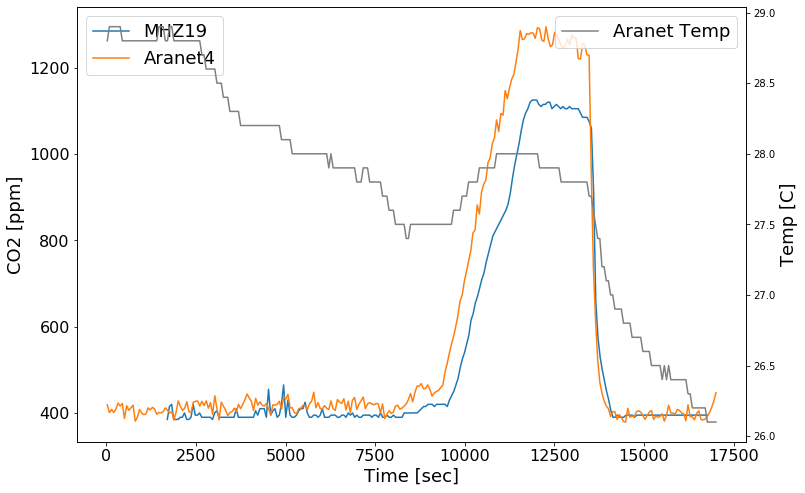

In [21]:
t0 = pd.to_datetime("2021-03-01 16:00:00")
tmax = pd.to_datetime("2021-03-01 20:45:00")
df_mhz19 = read_mhz19b_old("data/mhz19b_20210301.txt", t0)
display(df_mhz19.head())
df_aranet = read_aranet("data/Aranet4 00A0F_2021-03-01T20_44_28.csv", t0)
display(df_aranet.head())
fig, ax = plt.subplots(figsize=(12, 8))
mask = (df_mhz19.Time > t0) & (df_mhz19.Time < tmax)
ax.plot(df_mhz19.loc[mask].dt_sec, df_mhz19.loc[mask].CO2, label="MHZ19")
mask = (df_aranet.Time > t0) & (df_aranet.Time < tmax)
ax.plot(df_aranet.loc[mask].dt_sec, df_aranet.loc[mask].CO2, label="Aranet4")
ax.set_xlabel("Time [sec]", fontsize=18)
ax.set_ylabel("CO2 [ppm]", fontsize=18)
#ax.set_yscale("log")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18, loc=2)
ax2 = ax.twinx()
ax2.plot(df_aranet.loc[mask].dt_sec, df_aranet.loc[mask]["Temperature(C)"], label="Aranet Temp", c='gray')
ax2.set_ylabel("Temp [C]", fontsize=18)
plt.legend(fontsize=18, loc = 1)

,hr,min,sec,msec,CO2,Temp,Time,dt_sec
0,22,54,45,209,400,34,2021-03-01 22:54:45.209,285.209
1,22,54,47,228,400,34,2021-03-01 22:54:47.228,287.228
2,22,54,49,280,400,34,2021-03-01 22:54:49.280,289.280
3,22,54,51,332,399,34,2021-03-01 22:54:51.332,291.332
4,22,54,53,384,399,34,2021-03-01 22:54:53.384,293.384


,Time,CO2,Temperature(C),Humidity(%),Pressure(hPa),dt_sec
0,2021-02-26 11:22:26,384,17.5,75,1002,-300454.0
1,2021-02-26 11:23:26,387,17.5,75,1002,-300394.0
2,2021-02-26 11:24:26,391,17.5,75,1002,-300334.0
3,2021-02-26 11:25:26,394,17.4,75,1002,-300274.0
4,2021-02-26 11:26:26,390,17.4,75,1002,-300214.0


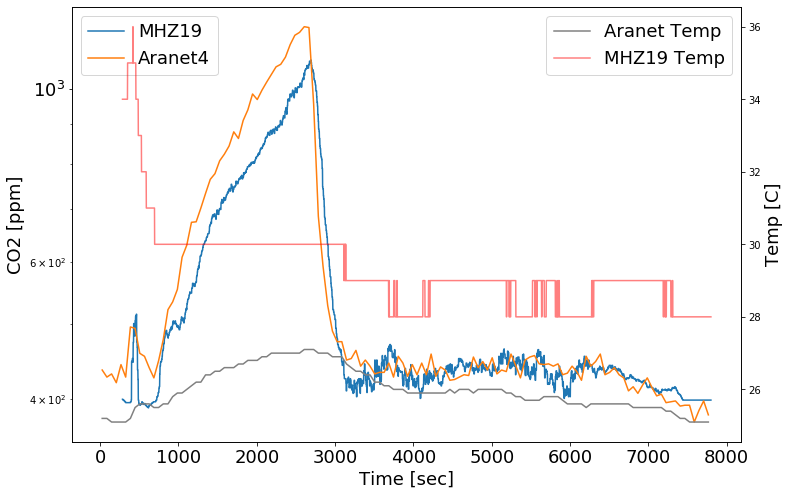

In [67]:
t0 = pd.to_datetime("2021-03-01 22:50:00")
tmax = pd.to_datetime("2021-03-02 01:00:00")
df_mhz19 = read_mhz19b_wifwaf("data/mhz19_esp8266_20210301.txt", t0)
masktime = df_mhz19.Time > pd.to_datetime("2021-03-01 12:00:00")
df_mhz19.Time = df_mhz19.Time.where(masktime, df_mhz19.Time + pd.Timedelta(1, unit='days'))
df_mhz19.dt_sec = df_mhz19.apply(lambda row: (row["Time"] - t0).total_seconds(), axis=1)
display(df_mhz19.head())
df_aranet = read_aranet("data/Aranet4 00A0F_2021-03-02T08_50_26.csv", t0)
display(df_aranet.head())
fig, ax = plt.subplots(figsize=(12, 8))
mask = (df_mhz19.Time > t0) & (df_mhz19.Time < tmax)
ax.plot(df_mhz19.loc[mask].dt_sec, df_mhz19.loc[mask].CO2, label="MHZ19")
mask = (df_aranet.Time > t0) & (df_aranet.Time < tmax)
ax.plot(df_aranet.loc[mask].dt_sec, df_aranet.loc[mask].CO2, label="Aranet4")
ax.set_xlabel("Time [sec]", fontsize=18)
ax.set_ylabel("CO2 [ppm]", fontsize=18)
ax.set_yscale("log")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.legend(fontsize=18, loc=2)
ax2 = ax.twinx()
ax2.plot(df_aranet.loc[mask].dt_sec, df_aranet.loc[mask]["Temperature(C)"], label="Aranet Temp", c='gray')
mask = (df_mhz19.Time > t0) & (df_mhz19.Time < tmax)
ax2.plot(df_mhz19.loc[mask].dt_sec, df_mhz19.loc[mask]["Temp"], label="MHZ19 Temp", c='r', alpha=0.5)
ax2.set_ylabel("Temp [C]", fontsize=18)
plt.legend(fontsize=18, loc = 1)